In [90]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sns.set()

In [91]:
# load the data

In [92]:
df = pd.read_csv('Bank_Churn.csv')
df.head(7)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [93]:
df.shape

(10000, 13)

In [94]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

# Data Preprocessing

In [95]:
# duplicates - cleaning part
df.duplicated().sum()

0

In [96]:
# null values checking
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [97]:
df.isnull().sum().sum()

0

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [99]:
df.drop(columns=["Surname"],inplace=True)
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [100]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [101]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [102]:
# encoding part

In [103]:
geo_map={'France':1,'Germany':2,'Spain':3}

In [104]:
df['Geography']=df['Geography'].map(geo_map)

In [105]:
gen_map={'Male':1,'Female':2}

In [106]:
df['Gender']=df['Gender'].map(gen_map)

In [107]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,3,2,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,3,2,43,2,125510.82,1,1,1,79084.10,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  int64  
 3   Gender           10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


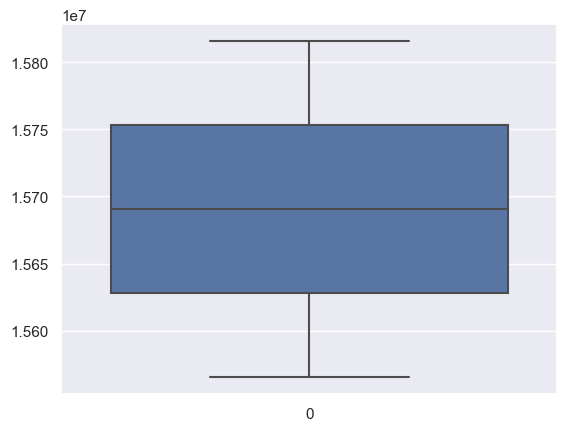

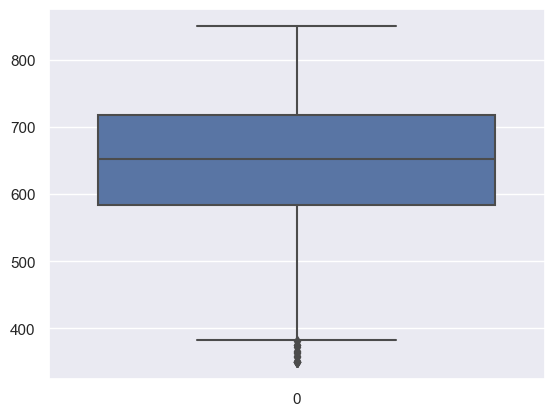

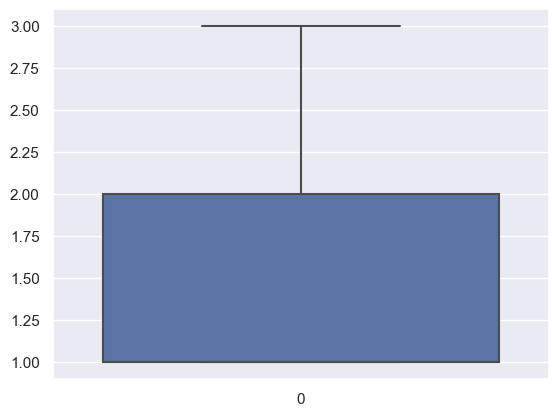

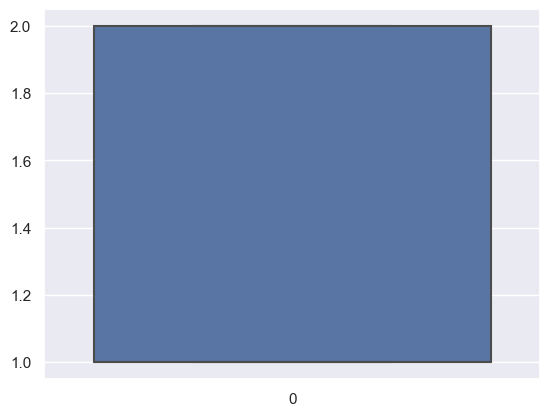

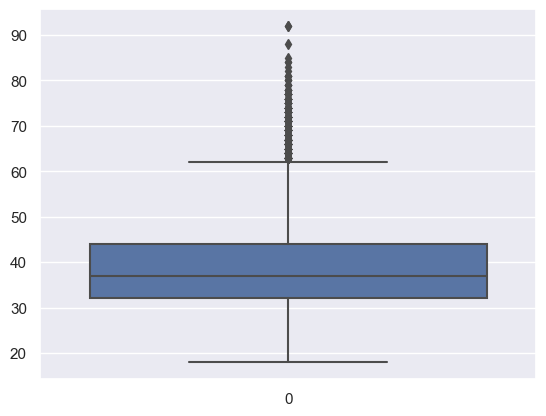

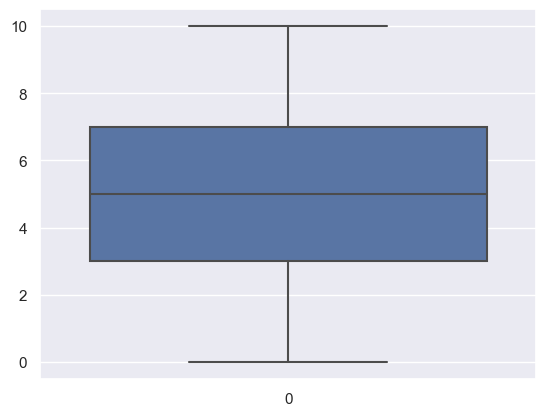

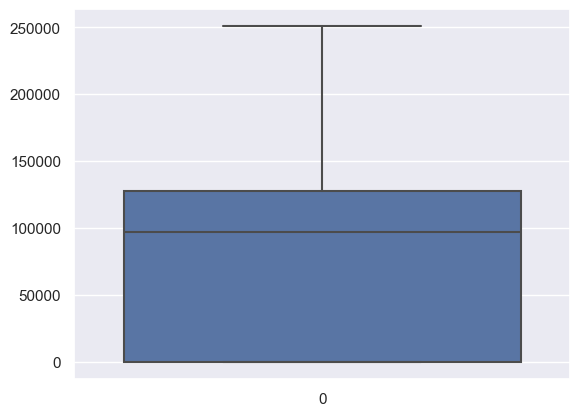

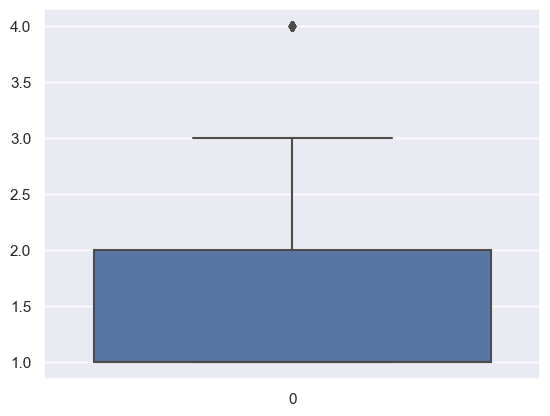

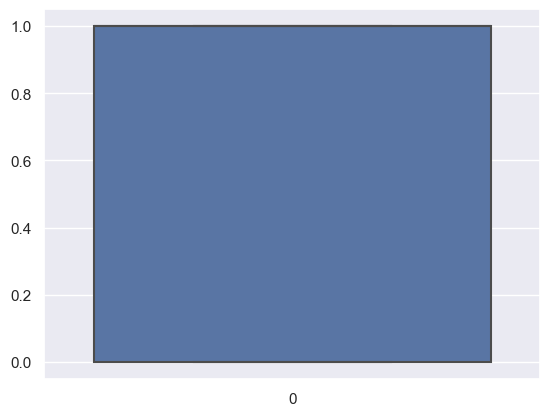

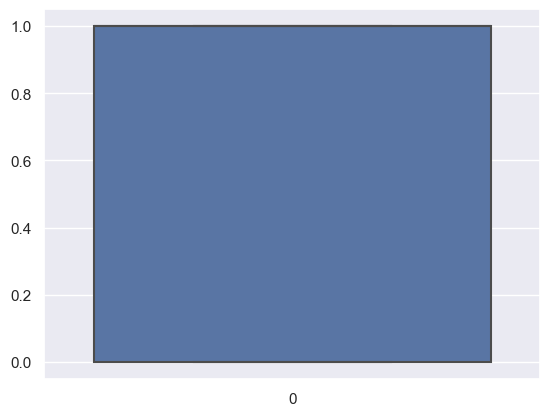

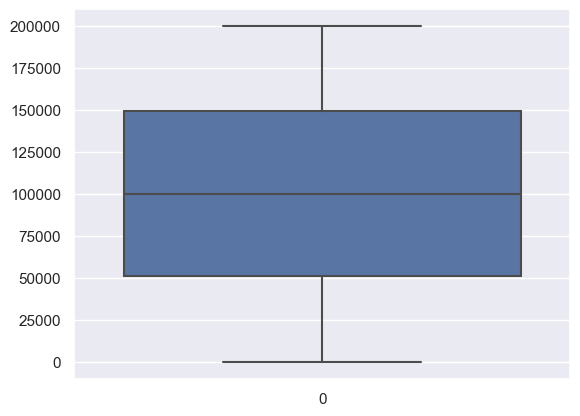

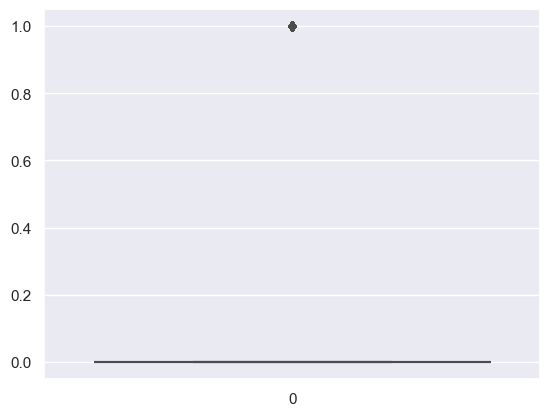

In [109]:
# Checking outlier

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

# EDA

In [18]:
import dtale
dtale.show(df)

In [110]:
df.describe()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,1.746300,1.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,1.000000,1.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,1.000000,1.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,1.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,2.000000,2.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,3.000000,2.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [111]:
skewness=df.skew()
print(skewness)

CustomerId         0.001149
CreditScore       -0.071607
Geography          0.500916
Gender             0.183596
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64


In [112]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,3,2,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,3,2,43,2,125510.82,1,1,1,79084.10,0


In [113]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# split data into train and test


In [114]:
# split the data into independent and dependent variables
x = df.drop('Exited', axis=1)
y = df['Exited']

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [116]:
pd.DataFrame(y_train).value_counts()

Exited
0         6356
1         1644
Name: count, dtype: int64

In [117]:
pd.DataFrame(y_test).value_counts()

Exited
0         1607
1          393
Name: count, dtype: int64

In [118]:
# scaling x_train and x_test data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Building machine Learning Algorithm

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [120]:
# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train_scaled, y_train)
y_pred_lr = logit.predict(x_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [121]:
# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train_scaled, y_train)
y_pred_dt = dtree.predict(x_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [122]:
# RandomForest
rforest = RandomForestClassifier()
rforest = rforest.fit(x_train_scaled, y_train)
y_pred_rf = rforest.predict(x_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train_scaled, y_train)
y_pred_xg = xgboost.predict(x_test_scaled)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

In [123]:

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# SVM
svm = SVC()
svm = svm.fit(x_train_scaled, y_train)
y_pred_svm = svm.predict(x_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train_scaled, y_train)
y_pred_nbt = nbt.predict(x_test_scaled)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

In [124]:
# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree), ('rforest',rforest),('xgboost',xgboost),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train_scaled, y_train)
pred_evc = model_evc.predict(x_test_scaled)
accuracy_evc = accuracy_score(y_test, pred_evc)

      Method Used  Accuracy
0  LogitRegession    0.8155
1           Dtree    0.7870
2         RForest    0.8645
3             XGB    0.8555
4             KNN    0.8315
5             SVM    0.8570
6             NBT    0.8290
7          Voting    0.8610
Axes(0.125,0.11;0.775x0.77)


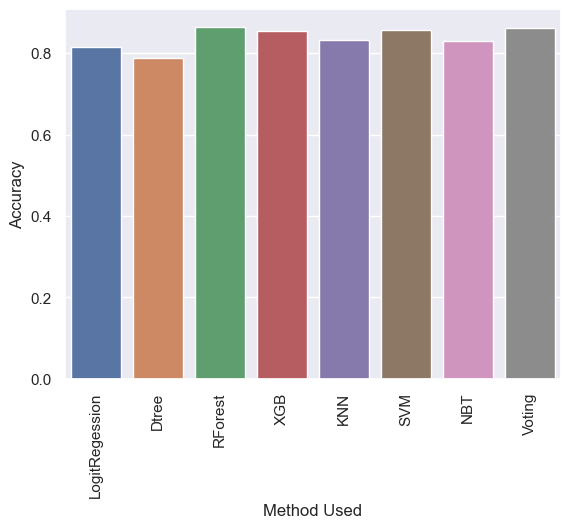

In [125]:
list1 = ['LogitRegession','Dtree','RForest','XGB','KNN','SVM','NBT','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xg,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc]
list3 = [logit,dtree,rforest,xgboost,knn,svm,nbt,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)   

In [126]:
# Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off

pred_evc_train = model_evc.predict(x_train_scaled)
pred_evc_test = model_evc.predict(x_test_scaled)
accuracy_evc_train = accuracy_score(y_train, pred_evc_train)
accuracy_evc_test = accuracy_score(y_test, pred_evc_test)

print("************************")
print("Training Accuracy :",accuracy_evc_train)
print("************************")
print("Testb Accuracy :",accuracy_evc_test)

************************
Training Accuracy : 0.91
************************
Testb Accuracy : 0.861


# Cross validation

In [127]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(model_evc, x_train_scaled, y_train, cv=10)
print("Training Accuracy :", training.mean())
print("***************")
print("Testb Accuracy :",accuracy_evc_test)

Training Accuracy : 0.8543750000000001
***************
Testb Accuracy : 0.861


In [128]:
training

array([0.87   , 0.85375, 0.85875, 0.8425 , 0.85375, 0.86125, 0.8625 ,
       0.84125, 0.85125, 0.84875])

In [129]:
# classification report

In [130]:
print("************************")
print("Training Accuracy :",classification_report(y_train, pred_evc_train))
print("************************")
print("Testb Accuracy :",classification_report(y_test, pred_evc_test))

************************
Training Accuracy :               precision    recall  f1-score   support

           0       0.90      1.00      0.95      6356
           1       0.98      0.57      0.72      1644

    accuracy                           0.91      8000
   macro avg       0.94      0.78      0.83      8000
weighted avg       0.92      0.91      0.90      8000

************************
Testb Accuracy :               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.82      0.38      0.52       393

    accuracy                           0.86      2000
   macro avg       0.84      0.68      0.72      2000
weighted avg       0.86      0.86      0.84      2000



In [131]:
# confusion matrix

In [132]:
print("************************")
print(confusion_matrix(y_train, pred_evc_train))
print("************************")
print(confusion_matrix(y_test, pred_evc_test))

************************
[[6341   15]
 [ 705  939]]
************************
[[1574   33]
 [ 245  148]]


2025-04-04 16:22:54,705 - INFO     - Executing shutdown due to inactivity...
2025-04-04 16:22:58,863 - INFO     - Executing shutdown...
2025-04-04 16:22:58,873 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
